Join the Data from part one and part two. 

In [1]:
import pandas as pd

# Load base CityBikes station data
stations_df = pd.read_csv("../data/processed/stations_df.csv")
stations_df = stations_df.rename(columns={"id": "station_id"})
stations_df["station_id"] = stations_df["station_id"].astype(str)

# Load POI summaries
fsq_summary = pd.read_csv("../data/processed/foursquare_summary.csv")
yelp_summary = pd.read_csv("../data/processed/yelp_summary.csv")
fsq_summary["station_id"] = fsq_summary["station_id"].astype(str)
yelp_summary["station_id"] = yelp_summary["station_id"].astype(str)

# Merge all datasets
joined_df = stations_df.merge(fsq_summary, on="station_id", how="left")
joined_df = joined_df.merge(yelp_summary, on="station_id", how="left", suffixes=("_fsq", "_yelp"))

# Save final merged dataset
joined_df.to_csv("../data/processed/joined_bike_venue_data.csv", index=False)
print("Final joined dataset saved to ../data/processed/joined_bike_venue_data.csv")

# Optional: Preview shape and head
print(f"Joined dataset shape: {joined_df.shape}")
display(joined_df.head())



✅ Final joined dataset saved to ../data/processed/joined_bike_venue_data.csv
Joined dataset shape: (1004, 10)


,station_id,name,latitude,longitude,free_bikes,venue_count_fsq,avg_distance,venue_count_yelp,avg_rating,avg_reviews
0,0013e5d100f68121835052a381ab2f23,Métro de l'Église (Ross / de l'Église),45.462831,-73.565938,7,20.0,217.250000,20.0,4.22500,29.5500
1,0040082e616edec293c0c74fcbf825c4,Square-Victoria (Viger / du Square-Victoria),45.502085,-73.562941,32,20.0,176.000000,20.0,4.41500,303.9000
2,00b7595b843f69c9041fca9e4e84700b,Hudson / Goyer,45.507437,-73.632658,7,3.0,369.666667,20.0,4.13500,23.1000
3,00c210cb99cf9d1b923c1548938aee56,Marché Jean-Talon (Casgrain / Shamrock),45.535190,-73.615482,3,20.0,147.050000,20.0,4.35500,48.0000
4,00c84f03ca5970eaa144ed6867d1e2b9,du Fort Saint-Louis / de la Perrière,45.613330,-73.451540,12,5.0,219.000000,16.0,2.05625,3.1875


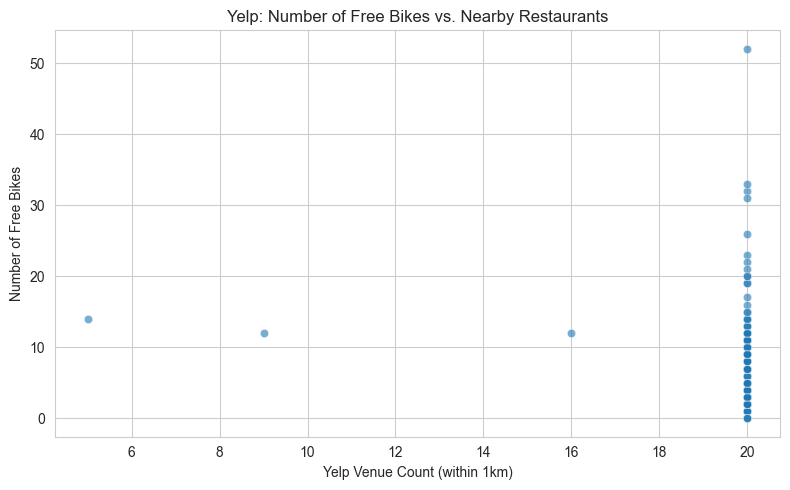

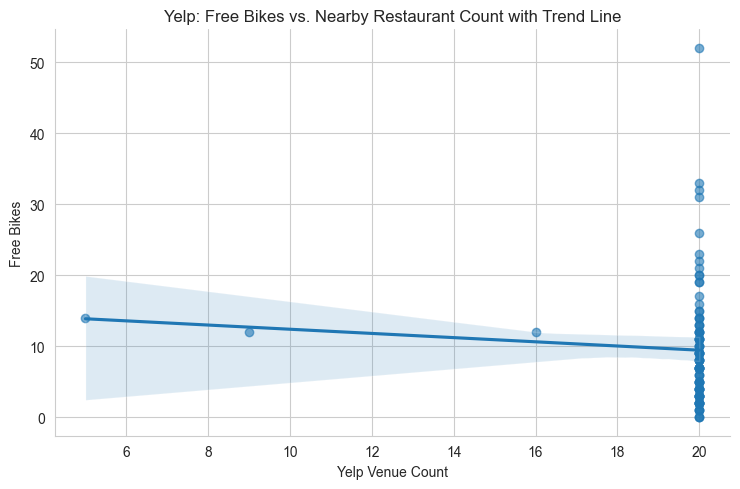

In [3]:
#Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the joined data
df = pd.read_csv("../data/processed/joined_bike_venue_data.csv")


fsq_df = df.dropna(subset=["venue_count_fsq", "free_bikes"])
yelp_df = df.dropna(subset=["venue_count_yelp", "free_bikes"])

# Drop rows with missing values in relevant columns
yelp_df = df.dropna(subset=["venue_count_yelp", "free_bikes"])

# Set plot size and style
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Scatterplot: venue count vs. free bikes
sns.scatterplot(
    data=yelp_df,
    x="venue_count_yelp",
    y="free_bikes",
    alpha=0.6
)

plt.title("Yelp: Number of Free Bikes vs. Nearby Restaurants")
plt.xlabel("Yelp Venue Count (within 1km)")
plt.ylabel("Number of Free Bikes")
plt.tight_layout()
plt.show()

sns.lmplot(
    data=yelp_df,
    x="venue_count_yelp",
    y="free_bikes",
    height=5,
    aspect=1.5,
    scatter_kws={"alpha": 0.6}
)
plt.title("Yelp: Free Bikes vs. Nearby Restaurant Count with Trend Line")
plt.xlabel("Yelp Venue Count")
plt.ylabel("Free Bikes")
plt.tight_layout()



# Database

In [ ]:
import pandas as pd import sqlite3

In [8]:
import pandas as pd
import sqlite3

# Load the final merged dataset
merged_df = pd.read_csv("../data/processed/joined_bike_venue_data.csv")

# Make sure station_id is a string for clean SQL joins
merged_df["station_id"] = merged_df["station_id"].astype(str)

# Create (or connect to) the SQLite database file
conn = sqlite3.connect("../data/bike_project.db")

# Store the merged data in a table called 'stations'
merged_df.to_sql("stations", conn, if_exists="replace", index=False)

# Done
conn.close()
print("✅ SQLite database updated: 'stations' table saved to ../data/bike_project.db")



✅ SQLite database updated: 'stations' table saved to ../data/bike_project.db


Look at the data before and after the join to validate your data.

In [9]:
print("Bike stations before join:", stations_df.shape[0])


Bike stations before join: 1004


In [10]:
print("Rows after join:", joined_df.shape[0])


Rows after join: 1004


In [ ]:
Data Validation Before and After Join
Before performing the join, the original CityBikes dataset contained 1,004 bike stations.

After joining in data from Foursquare and Yelp, the final merged dataset also contains 1,004 rows, confirming that no bike stations were lost in the process.

We used a left join to ensure that every bike station was retained, even if some had missing POI data from Yelp or Foursquare. These missing values are expected in cases where no venues were returned by the APIs near a given station, and will be addressed during modeling.